In [42]:
import os.path

import win32com.client
import traceback
import sys
import importlib
import pandas as pd
import numpy as np
import platform 

# Since we run in different environment, we need to handle absolute paths somehow.
# My suggestion is to use the computer name as an indication of the environment.
# If you implement in similar way in your code, I will be able to run the code without altering it

computer_name = platform.node()  # Use computer name to configure data for different run environments
# Specify the path to the helpers.py file
if computer_name == 'Josef-pc':
    helpers_path = r"C:\Program Files\PTV Vision\PTV Visum 2024\Exe\Python\Lib\site-packages\VisumPy\helpers.py"
elif computer_name == 'jesper-pc':
    helpers_path = 'D:\\PTV Visum 2024\\Exe\\Python\\Lib\\site-packages\\VisumPy\\helpers.py'

# Load the module specified by the path
spec = importlib.util.spec_from_file_location("helpers", helpers_path)
helpers = importlib.util.module_from_spec(spec)
sys.modules["helpers"] = helpers
spec.loader.exec_module(helpers)

# work path
if computer_name == 'Josef-pc':
    work_path = r"D:\Users\Joffa\PycharmProjects\AH203X_Degree_Project_in_Transport_Science\Mandl VISUM"
elif computer_name == 'jesper-pc':
    #work_path = r"C:\Users\jespe\Documents\Python\GitHub\AH203X_Degree_Project_in_Transport_Science\Mandl VISUM"
    #Halmstad
    work_path = r"C:\Users\jespe\Desktop\Halmstad VISUM\Visum kollektivtrafik"
# Path to VISUM file
#visum_file_path = os.path.join(work_path, 'Mandl_Visum - headway - cba - kopia.ver')
#Halmsad
visum_file_path = os.path.join(work_path, 'Koll_Bas2016.ver')

# Uses Mandl_Visum_set_runtimes.ver as version file.
# The only difference I made in the version file is that I added a procedure step that sets the lines run times from the link run time.
# Then you do not need to set in an accurate travel time for the time profile items


# Create a Visum instance
#Visum = win32com.client.Dispatch("Visum.Visum")
Visum = win32com.client.gencache.EnsureDispatch('Visum.Visum')  # To generate constants

# Load the VISUM file
Visum.LoadVersion(visum_file_path)

# Access the network object
net = Visum.Net

In [5]:
distance = helpers.GetSkimMatrixRaw(Visum, 18)
df_distance = pd.DataFrame(distance)
stop_numbers = list(range(1, len(distance) + 1))

# Set the DataFrame's index and columns to match stop numbers.
df_distance.index = stop_numbers
df_distance.columns = stop_numbers
df_distance.head()

,1,2,3,4,5,6,7,8,9,10,...,449,450,451,452,453,454,455,456,457,458
1,0.000000,3.330458,3.165792,2.147038,2.901076,2.460870,2.596882,2.193314,2.385936,5.763485,...,1.094582,1.234564,0.922907,16.373183,21.228103,34.428084,34.506835,40.253353,23.567652,999999.0
2,3.330458,0.000000,0.746767,5.477384,0.697213,4.965763,0.845956,1.173146,4.977352,8.270768,...,3.266693,3.207427,4.012766,18.728318,22.066623,36.595532,33.362207,39.099061,24.019164,999999.0
3,3.165792,0.746767,0.000000,5.276676,0.301816,4.466659,0.614909,1.020951,4.495253,8.479426,...,3.350611,3.325623,3.960654,18.082987,22.660465,35.912015,32.765196,38.506107,24.663273,999999.0
4,2.147038,5.477384,5.276676,0.000000,5.025850,2.387677,4.729538,4.332561,2.244199,4.748402,...,2.628949,2.775154,1.679010,15.028539,20.980108,33.110523,35.366201,41.097994,23.551350,999999.0
5,2.901076,0.697213,0.301816,5.025850,0.000000,4.321872,0.317838,0.729565,4.342013,8.177905,...,3.052267,3.025402,3.678051,18.034838,22.405368,35.898328,33.022811,38.764920,24.429099,999999.0


In [43]:
# Retrieve an existing line by its name or number
line_name_or_number = 'ORG_1'
#line = net.Lines.ItemByKey(line_name_or_number)
# Display information about the line
#print(f"Line Name: {line.AttValue('Name')}")
#print(f"Transport System: {line.AttValue('TSysCode')}")
#print(f"Number of stops: {line.AttValue('StopsServed')}")

#Network information
#Line
for Line in Visum.Net.Lines:
    # Access attributes here
    Line_name = Line.AttValue('Name')
    print(f"Lines Name: {Line_name}")

#line route
for LineRoute in Visum.Net.LineRoutes:
    # Access attributes here
    LineRoute_name = LineRoute.AttValue('NAME')
    print(f"LinesRoute Name: {LineRoute_name}")

    #TO CHANGE NAME OF A ROUTE
    #if LineRoute_name == "1":
    #    print("change name")
    #    LineRoute.SetAttValue('Name', "101")

#stops
for stop in Visum.Net.StopPoints:
    # Access attributes here
    stop_name = stop.AttValue('No')
    print(f"Stop Name: {stop_name}")

for tp in Visum.Net.TimeProfiles:
    tp_name = tp.AttValue('NAME')
    print(f"TimeProfiles Name: {tp_name}")
#for tpi in Visum.Net.TimeProfileItems:
#    tpi_name = tpi.AttValue('DEP')
#    print(f"TimeProfileItem Name: {tpi_name}")
#print("")
#for vj in Visum.Net.VehicleJourneys:
#    vj_name = vj.AttValue('NO')
#    print("hi")
#    print(f"VehicleJourneys Name: {vj_name}")
#print("")


Lines Name: 10
Lines Name: 145
Lines Name: 20
Lines Name: 30
Lines Name: 303
Lines Name: 31
Lines Name: 314
Lines Name: 316
Lines Name: 318
Lines Name: 319
Lines Name: 320
Lines Name: 323
Lines Name: 324
Lines Name: 325
Lines Name: 330
Lines Name: 340
Lines Name: 350
Lines Name: 351
Lines Name: 40
Lines Name: 400
Lines Name: 50
Lines Name: 60
Lines Name: 62
Lines Name: 63
Lines Name: 64
Lines Name: 65
Lines Name: 70
Lines Name: 77
Lines Name: Krösa
Lines Name: Påtåg
Lines Name: SJ
Lines Name: Ötåg
LinesRoute Name: 10_2a
LinesRoute Name: 10_1a
LinesRoute Name: 10_1b
LinesRoute Name: 10_2b
LinesRoute Name: 20a
LinesRoute Name: 20b
LinesRoute Name: 30_1a
LinesRoute Name: 30_2a
LinesRoute Name: 30_3a
LinesRoute Name: 30_1b
LinesRoute Name: 30_2b
LinesRoute Name: 30_3b
LinesRoute Name: 31a
LinesRoute Name: 31b
LinesRoute Name: 40a
LinesRoute Name: 40b
LinesRoute Name: 50_1a
LinesRoute Name: 50_2a
LinesRoute Name: 50_1b
LinesRoute Name: 50_2b
LinesRoute Name: 60a
LinesRoute Name: 60b
LinesRo

In [52]:
unu=["352,353,354,353,356,355,358,357,360,359,54,55,314,342,29,343,395,1,19,18,23,22,284,285,307,308,305,306,309,303,299,297,298,295,296,293,326,294,318,319,316,317,315,346,345,86,86,348,346,315,317,316,319,318,294,326,293,296,295,298,297,299,303,309,306,305,308,307,285,284,22,23,18,19,1,395,343,29,342,314,55,54,359,360,357,358,355,356,353,354,353,352,352,353,354,353,356,355,358,357,360,359,54,55,314,342,29352,353,354,353,356,355,358,357,360,359,54,55,314,342,29,343,395,1,19,18,23,22,284,285,307,308,305,306,309,303,299,297,298,295,296,293,326,294,318,319,316,317,315,346,345,86,86,348,346,315,317,316,319,318,294,326,293,296,295,298,297,299,303,309,306,305,308,307,285,284,22,23,18,19,1,395,343,29,342,314,55,54,359,360,357,358,355,356,353,354,353,352,352,353,354,353,356,355,358,357,360,359,54,55,314,342,29,29,342,314,55,54,359,360,357,358,355,356,353,354,353,352,334,329,328,363,362,365,364,45,313,42,351,43,29,343,395,1,19,18,23,22,39,38,2,418,441,442,439,432,438,436,437,431,431,437,436,438,432,439,442,441,418,2,38,39,22,23,18,19,1,395,343,29,43,351,42,313,45,364,365,362,363,328,329,334,334,329,328,363,362,365,364,45,313,42,351,43,29,343,395,1,19,18,23,22,39,38,2,418,441,442,439,432,438,436,437,431,434,299,301,302,300,327,302,300,327,302,301,299,434,431,437,436,438,432,439,442,441,418,2,38,39,22,23,18,19,1,395,343,29,43,351,42,313,45,364,365,362,363,328,329,334,363,362,365,364,45,313,42,351,43,29,343,395,1,19,18,23,22,39,38,2,418,441,442,439,432,438,436,437,431,431,437,436,438,432,439,442,441,418,2,38,39,22,23,18,19,1,395,343,29,43,351,42,313,45,364,365,362,363,352,353,354,353,356,355,358,357,360,359,54,55,314,341,344,29,343,395,1,19,18,23,22,284,285,307,308,305,306,336,433,433,336,306,305,308,307,285,284,22,23,18,19,1,395,343,29,344,341,314,55,54,359,360,357,358,355,356,353,354,353,352,29,343,395,1,19,18,23,22,284,285,307,308,305,306,336,433,433,336,306,305,308,307,285,284,22,23,18,19,1,395,343,29,29,343,395,1,20,289,290,287,288,292,26,27,83,337,25,304,335,432,440,435,306,336,433,433,336,306,435,440,432,335,304,25,337,83,27,26,292,287,288,20,1,395,343,29,29,1,19,18,24,23,22,39,38,2,195,186,185,184,183,190,188,77,80,86,84,75,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,75,84,86,80,77,188,190,183,184,185,186,195,2,38,39,22,23,24,18,19,1,29,29,1,19,18,24,23,8,7,5,25,51,189,82,80,86,84,75,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,75,84,86,80,82,189,51,3,5,7,8,23,24,18,19,1,29,29,1,20,16,26,27,83,32,25,51,189,82,80,86,84,75,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,75,84,86,80,82,189,51,25,32,83,27,26,16,20,1,29,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,29,1,20,16,26,27,83,32,25,51,189,82,80,86,84,75,73,187,178,177,72,176,65,175,182,181,64,70,68,274,273,272,271,278,180,179,279,279,179,180,278,271,272,273,274,68,70,64,181,182,175,65,176,72,177,178,187,73,75,84,86,80,82,189,51,25,32,83,27,26,16,20,1,29,29,1,20,16,26,27,83,32,25,51,189,82,80,86,84,75,73,170,169,168,60,63,174,277,167,168,169,170,73,187,178,177,72,176,65,175,182,181,64,70,68,274,273,272,271,278,180,179,279,279,179,180,278,271,272,273,274,68,70,64,181,182,175,65,176,72,177,178,187,73,170,169,168,167,277,174,63,60,168,169,170,73,75,84,86,80,82,189,51,25,32,83,27,26,16,20,1,29,29,342,314,55,54,359,360,357,358,355,356,353,354,353,352,334,329,328,363,362,365,364,45,313,42,351,43,29,343,395,1,19,18,23,22,39,38,2,418,441,442,439,432,438,436,437,431,431,437,436,438,432,439,442,441,418,2,38,39,22,23,18,19,1,395,343,29,43,351,42,313,45,364,365,362,363,328,329,334,334,329,328,363,362,365,364,45,313,42,351,43,29,343,395,1,19,18,23,22,39,38,2,418,441,442,439,432,438,436,437,431,434,299,301,302,300,327,302,300,327,302,301,299,434,431,437,436,438,432,439,442,441,418,2,38,39,22,23,18,19,1,395,343,29,43,351,42,313,45,364,365,362,363,328,329,334,363,362,365,364,45,313,42,351,43,29,343,395,1,19,18,23,22,39,38,2,418,441,442,439,432,438,436,437,431,431,437,436,438,432,439,442,441,418,2,38,39,22,23,18,19,1,395,343,29,43,351,42,313,45,364,365,362,363,352,353,354,353,356,355,358,357,360,359,54,55,314,341,344,29,343,395,1,19,18,23,22,284,285,307,308,305,306,336,433,433,336,306,305,308,307,285,284,22,23,18,19,1,395,343,29,344,341,314,55,54,359,360,357,358,355,356,353,354,353,352,29,343,395,1,19,18,23,22,284,285,307,308,305,306,336,433,433,336,306,305,308,307,285,284,22,23,18,19,1,395,343,29,29,343,395,1,20,289,290,287,288,292,26,27,83,337,25,304,335,432,440,435,306,336,433,433,336,306,435,440,432,335,304,25,337,83,27,26,292,287,288,20,1,395,343,29,29,1,19,18,24,23,22,39,38,2,195,186,185,184,183,190,188,77,80,86,84,75,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,75,84,86,80,77,188,190,183,184,185,186,195,2,38,39,22,23,24,18,19,1,29,29,1,19,18,24,23,8,7,5,25,51,189,82,80,86,84,75,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,75,84,86,80,82,189,51,3,5,7,8,23,24,18,19,1,29,29,1,20,16,26,27,83,32,25,51,189,82,80,86,84,75,73,170,169,168,60,63,174,277,277,174,63,60,168,169,170,73,75,84,86,80,82,189,51,25,32,83,27,26,16,20,1,29,73,170,169,168,60,63,174,277.277,174,63,60,168,169,170,73,29,1,20,16,26,27,83,32,25,51,189,82,80,86,84,75,73,187,178,177,72,176,65,175,182,181,64,70,68,274,273,272,271,278,180,179,279,279,179,180,278,271,272,273,274,68,70,64,181,182,175,65,176,72,177,178,187,73,75,84,86,80,82,189,51,25,32,83,27,26,16,20,1,29,29,1,20,16,26,27,83,32,25,51,189,82,80,86,84,75,73,170,169,168,60,63,174,277,167,168,169,170,73,187,178,177,72,176,65,175,182,181,64,70,68,274,273,272,271,278,180,179,279,279,179,180,278,271,272,273,274,68,70,64,181,182,175,65,176,72,177,178,187,73,170,169,168,167,277,174,63,60,168,169,170,73,75,84,86,80,82,189,51,25,32,83,27,26,16,20,1,29"]


def get_unique_numbers_from_strings(number_strings):
    numbers = set()  # Using a set to handle uniqueness
    for number_string in number_strings:
        # Splitting each string by commas and stripping whitespace, then adding to the set
        numbers.update(map(int, number_string.split(',')))
    return sorted(numbers)  # Sorting the set converts it to a list


uni=get_unique_numbers_from_strings(unu)
uni

ValueError: invalid literal for int() with base 10: '277.277'

In [3]:
stop = net.StopPoints.ItemByKey(15)
# Display information about the line
print(f"stop Name: {stop.AttValue('No')}")

stop Name: 15.0


In [4]:
remove_line_routes()

In [2]:
#REMOVE ALL BUSLINES
def remove_line_routes():
    for LineRoute in Visum.Net.LineRoutes:
        # Access attributes here
        #Making sure that only the new lines are rema
        if LineRoute.AttValue('LINENAME') == "ORG_1" or LineRoute.AttValue('LINENAME') == "1":
            Visum.Net.RemoveLineRoute(LineRoute)
#remove_line_routes()
import random
def generate_bus_routes(all_stops, num_routes, max_stops_per_route):
    random.shuffle(all_stops)  # Shuffle the list of stops for randomness
    routes = []

    for _ in range(num_routes):
        route_length = random.randint(2, max_stops_per_route)  # Determine the length of the route
        route = random.sample(all_stops, route_length)  # Generate the route
        routes.append(route)

    return routes
#Collect all stops in network
def get_all_stop_no():
    all_stops = []  # Initialize an empty list to store line route names
    # Iterate over all LineRoutes in the Visum network
    for stop in Visum.Net.StopPoints:
        # Access the 'No' attribute of each Stop
        stop_no = stop.AttValue('No')
        # Add the name to the list
        all_stops.append(stop_no)
    
    return all_stops  # Return the list of line route names
def create_route(route_vector, bus_nr, direction):
    # use constants
    C = win32com.client.constants
    
    #retreive some required objects from the network
    BusLine = Visum.Net.Lines.ItemByKey("ORG_1")
    dirTo = Visum.Net.Directions.GetAll[direction]
    stopsR1 = Visum.CreateNetElements()
    for stop in route_vector:
        stopPoint = Visum.Net.StopPoints.ItemByKey(stop)
        stopsR1.Add(stopPoint)

              
    paraR1 = Visum.IO.CreateNetReadRouteSearchTSys() #create the parameter object
    paraR1.SetAttValue("HowToHandleIncompleteRoute", 3) # search shortest path if line route has gaps
    paraR1.SetAttValue("ShortestPathCriterion", 3) # link travel time of current transport system
    paraR1.SetAttValue("IncludeBlockedLinks", False) # don't route over closed links
    paraR1.SetAttValue("IncludeBlockedTurns", False) # don't route over closed turns
    paraR1.SetAttValue("MaxDeviationFactor", 1000) # maximum deviation factor of shortest path search from direct distance
    paraR1.SetAttValue("WhatToDoIfShortestPathNotFound", 0) # if no shortest path is found, don't read
    
    LineRoute =  Visum.Net.AddLineRoute(bus_nr, BusLine, dirTo, stopsR1, paraR1) #create the line route
    
    start_time = 0  # Start at 0 minutes (midnight)
    end_time = 24 * 60 * 60  # End at 86 400seconds or 1440 minutes (24 hours)
    frequency_seconds = 10 * 60 
    
    # Create a time profile for the line route
    TimeProfileName = "TP" + str(bus_nr)
    tp1 = Visum.Net.AddTimeProfile(TimeProfileName, LineRoute)
    i = 1
    for time_in_seconds in range(start_time, end_time, frequency_seconds):
        trip1 = Visum.Net.AddVehicleJourney(bus_nr+str(i),tp1)
        trip1.SetAttValue("Dep",time_in_seconds)
        i+=1
def generate_Visum_network(num_routes, max_stops_per_route):
    all_stops = get_all_stop_no()
    bus_routes=generate_bus_routes(all_stops, num_routes, max_stops_per_route)
    for i in range(num_routes):
        for direction in range(2):
            if i >= 10:
                bus_nr = "1" + str(i+10)+str(direction)
            else:
                bus_nr= "11"+str(i)+str(direction)
            create_route(bus_routes[i],bus_nr, direction)
    return bus_routes

def load_net_file(net_file):
    # use constants
    C = win32com.client.constants

    # create AddNetRead-Object and specify desired conflict avoiding method
    anrController = Visum.IO.CreateAddNetReadController()
    anrController.SetWhatToDo("Line", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("LineRoute", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("LineRouteItem", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("TimeProfile", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("TimeProfileItem", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("VehJourney", C.AddNetRead_Ignore)
    anrController.SetUseNumericOffset("VehJourney", True)
    anrController.SetWhatToDo("VehJourneyItem", C.AddNetRead_DoNothing)
    anrController.SetWhatToDo("VehJourneySection", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("ChainedUpVehJourneySection", C.AddNetRead_DoNothing)
    anrController.SetWhatToDo("UserAttDef", C.AddNetRead_Ignore)
    anrController.SetWhatToDo("Operator", C.AddNetRead_OverWrite)

    # anrController.SetConflictAvoidingForAll(10000, "ORG_")

    # create NetRouteSearchTSys-Object and choose route search options
    # create one object per TSys if desired
    routesearchparameters = Visum.IO.CreateNetReadRouteSearchTSys()
    routesearchparameters.SetAttValue("HowToHandleIncompleteRoute",
                                      C.RouteSearchHandleIncompleteRouteTSearchShortestPath)  # search shortest path if line route has gaps
    routesearchparameters.SetAttValue("ShortestPathCriterion",
                                      C.ShortestPathCriterion_LinkLength)  # Value 4: Link length
    routesearchparameters.SetAttValue("IncludeBlockedLinks", False)  # don't route over closed links
    routesearchparameters.SetAttValue("IncludeBlockedTurns", False)  # don't route over closed turns
    routesearchparameters.SetAttValue("MaxDeviationFactor",
                                      1000)  # maximum deviation factor of shortest path search from direct distance
    routesearchparameters.SetAttValue("WhatToDoIfShortestPathNotFound",
                                      C.IfNotFound_DontRead)  # if no shortest path is found, don't read
    routesearchparameters.SetAttValue("WhatToDoIfStopPointIsBlocked",
                                      C.ifStopPointIsBlocked_DontReadTimeProfile)  # if stop point is blocked, don't read
    routesearchparameters.SetAttValue("WhatToDoIfStopPointNotFound",
                                      C.ifStopPointNotFound_DontReadLineRoute)  # if stop point not found, don't read

    # create NetRouteSearch-Object and assign NetRouteSearchTSys-objects
    nrrsController = Visum.IO.CreateNetReadRouteSearch()
    nrrsController.SetForAllTSys(routesearchparameters)

    #Load net file
    Visum.IO.LoadNet(net_file, True, nrrsController, anrController)

from datetime import datetime, timedelta
def save_as_net_file(filepath, network_data, selected_row=0):
    #This funciton takes a DF with bus informaiton, It will save a specific row in a .NET format, the row is set by "selected_row"
    #The format of the dataframe is as follows
    """
    NET Score Line 	TSYSCODE  FARESYSTEMSET   VEHCOMBNO 	 Bus_nr 	       Bus_tp 	          Bus_routes 	      frequency MIN 	 time_offset MIN

    With example values such ass 

    1;  352  ;ORG_1   B;      BLANK;           BLANK;     [[110],[111]];   [[tp110],[tp111]];   [[1,2,3],[3,6,2]]      [[10],[5]]          [[0],[1]]
    """
    with open(filepath, 'w', encoding='utf-8') as file:
        headway = True
        # Header
        file.write("$VISION\n* Table: Version block\n$VERSION:VERSNR;FILETYPE;LANGUAGE;UNIT\n15;Net;ENG;KM\n")

        # Only one row expected for compacted data, handling accordingly
        row = network_data.iloc[selected_row]

        # Line 
        file.write("* \n* Table: Lines\n$LINE:NAME;TSYSCODE;FARESYSTEMSET;VEHCOMBNO\n")
        file.write(f"{row['Line']};{row['TSYSCODE']};{row['FARESYSTEMSET']};{row['VEHCOMBNO']}\n")

        # Line Route 
        

        if headway == True: 
            file.write("\n* Table: Line routes\n$LINEROUTE:LINENAME;NAME;DIRECTIONCODE;ISCIRCLELINE;HEADWAY\n")
            for bus_nr, freq in zip(row['Bus_nr'], row['frequency']):
                file.write(f"{row['Line']};{bus_nr};>;0;{freq*60}\n")
                file.write(f"{row['Line']};{bus_nr+'0'};<;0;{freq*60}\n")
        else:
            file.write("\n* Table: Line routes\n$LINEROUTE:LINENAME;NAME;DIRECTIONCODE;ISCIRCLELINE\n")
            for bus_nr in row['Bus_nr']:
                file.write(f"{row['Line']};{bus_nr};>;0\n")
                file.write(f"{row['Line']};{bus_nr+'0'};<;0\n")
        # Line route items 
        file.write("\n* Table: Line route items\n$LINEROUTEITEM:LINENAME;LINEROUTENAME;DIRECTIONCODE;INDEX;ISROUTEPOINT;NODENO;STOPPOINTNO\n")
        for bus_nr_org, bus_route in zip(row['Bus_nr'], row['Bus_routes']):
            for dir in ['>','<']:
                for index, j in enumerate(bus_route, start=1):
                    if dir == '<':
                        bus_nr = bus_nr_org + '0'
                    else:
                        bus_nr = bus_nr_org
                    file.write(f"{row['Line']};{bus_nr};{dir};{index};1;{int(j)};{int(j)}\n")

        # Time profiles 
        file.write("\n* Table: Time profiles\n$TIMEPROFILE:LINENAME;LINEROUTENAME;DIRECTIONCODE;NAME;VEHCOMBNO\n")
        for bus_nr_org, bus_tp in zip(row['Bus_nr'], row['Bus_tp']):
            for dir in ['>','<']:
                if dir == '<':
                    bus_nr = bus_nr_org + '0'
                else:
                    bus_nr = bus_nr_org
                file.write(f"{row['Line']};{bus_nr};{dir};{bus_tp};\n")

        # Time profile items 
        file.write("\n* Table: Time profile items\n$TIMEPROFILEITEM:LINENAME;LINEROUTENAME;DIRECTIONCODE;TIMEPROFILENAME;INDEX;LRITEMINDEX;ALIGHT;BOARD;ARR;DEP\n")
        for bus_nr_org, bus_tp, bus_route_list in zip(row['Bus_nr'], row['Bus_tp'], row['Bus_routes']):
            for dir in ['>','<']:
                if dir == '<':
                    bus_nr = bus_nr_org + '0'
                else:
                    bus_nr = bus_nr_org
                dep_time = datetime.strptime("00:00:00", "%H:%M:%S")
                for stop_index, j in enumerate(bus_route_list, start=1):
                    alight = 0 if stop_index == 1 else 1
                    board = 1 if stop_index == len(bus_route_list) else 1
                    file.write(f"{row['Line']};{bus_nr};{dir};{bus_tp};{stop_index};{stop_index};{alight};{board};{dep_time.strftime('%H:%M:%S')};{dep_time.strftime('%H:%M:%S')}\n")
                    dep_time += timedelta(minutes=1)

        # Vehicle journeys 
        
        if headway == False:
            file.write("\n* Table: Vehicle journeys\n$VEHJOURNEY:NO;DEP;LINENAME;LINEROUTENAME;DIRECTIONCODE;TIMEPROFILENAME;FROMTPROFITEMINDEX;TOTPROFITEMINDEX\n")
            journey_no = 11101
            journeys=[]
            for bus_nr_org, bus_tp, bus_route_list, freq, time_offset in zip(row['Bus_nr'], row['Bus_tp'], row['Bus_routes'], row['frequency'], row['time_offset']):
                for dir in ['>','<']:
                    if dir == '<':
                        bus_nr = bus_nr_org + '0'
                    else:
                        bus_nr = bus_nr_org
                    # Initial start time for the first journey
                    start_time = datetime.strptime("00:00:00", "%H:%M:%S") + timedelta(minutes=time_offset)
                    current_time = start_time
                    end_time = datetime.strptime("23:59:59", "%H:%M:%S")
                    while current_time <= end_time:
                        file.write(f"{journey_no};{current_time.strftime('%H:%M:%S')};{row['Line']};{bus_nr};{dir};{bus_tp};{1};{len(bus_route_list)}\n")
                        current_time += timedelta(minutes=freq)
                        journeys.append([journey_no, len(bus_route_list)])
                        journey_no += 1
           
            # Vehicle journey sections
            file.write("\n* Table: Vehicle journey sections\n$VEHJOURNEYSECTION:VEHJOURNEYNO;NO;FROMTPROFITEMINDEX;TOTPROFITEMINDEX;VALIDDAYSNO\n")
            index=1
            for jouney_index in journeys:
                file.write(f"{jouney_index[0]};{1};{1};{jouney_index[1]};1\n")

    #print(f"Data successfully saved to {filepath} in the correct format.")
    
def generate_Visum_network_net(network_no,num_routes, max_stops_per_route, net_file, stops = get_all_stop_no()):
    """
    Generate a Visum timetable and save it as .net file

    :param num_routes:
    :param max_stops_per_route:
    :param net_file:
    :param stops: the stops you want to generate routes from, default is all stops in network
    :return:
    """
    bus_routes = generate_bus_routes(stops, num_routes, max_stops_per_route)
    bus_nr = []
    for i in range(num_routes):
        if i >= 10:
            bus_nr.append("1" + str(i + 10))
        else:
            bus_nr.append("11" + str(i))
    lines = [{'NAME': 'ORG_1', 'TSYSCODE': 'B', 'FARESYSTEMSET': '', 'VEHCOMBNO': ''}]
    
    # Preparing data for DataFrame
    data = {
        'NET': [network_no] * num_routes,
        'Line': ['ORG_1'] * num_routes,
        'TSYSCODE': ['B'] * num_routes,
        'FARESYSTEMSET': [''] * num_routes,
        'VEHCOMBNO': [''] * num_routes,
        'Bus_nr': bus_nr,
        'Bus_tp': ["TP" + nr for nr in bus_nr],
        'Bus_routes': bus_routes,
        'frequency': [30] * num_routes,
        'time_offset': [0] * num_routes,
    }

    # Create DataFrame
    network_data = pd.DataFrame(data)
    
    
    
    network_row = network_data.groupby(['NET', 'Line', 'TSYSCODE', 'FARESYSTEMSET','VEHCOMBNO']).agg({
    'Bus_nr': lambda x: list(x),
    'Bus_tp': lambda x: list(x),
    'Bus_routes': lambda x: list(x),
    'frequency': lambda x: list(x),
    'time_offset': lambda x: list(x)
    }).reset_index()
    save_as_net_file(net_file, network_row)
    return network_row

def generate_intial_population(pop_size, num_routes, max_stops_per_route, net_file, stops = get_all_stop_no()):
    """
    Generate a dataframe with a intial populaiton and score
    :pop_size: population size
    :param num_routes:
    :param max_stops_per_route:
    :param net_file:
    :return:
    """
    population_df = pd.DataFrame(columns=['NET','Score', 'Line', 'TSYSCODE', 'FARESYSTEMSET', 'VEHCOMBNO','Bus_nr', 'Bus_tp', 'Bus_routes', 'frequency', 'time_offset'])
    for i in range(pop_size):
        network_df = generate_Visum_network_net(i,num_routes, max_stops_per_route,net_file,stops)
        remove_line_routes()
        load_net_file(visum_file_path)

        Visum.Procedures.Execute()

        score = Visum.Net.AttValue('Score')
        network_df.insert(1,"Score",score)
        population_df = pd.concat([population_df, network_df], ignore_index=True)
        #print(i, cp_score)
    #print(population_df)
    return population_df
    
def uniform_crossover(routes1, routes2):
    # Initialize the offspring with empty lists
    child1_routes = []
    child2_routes = []

    # For each route, randomly choose which parent it comes from
    for i in range(len(routes1)):
        if random.random() < 0.5:
            child1_routes.append(list(routes1[i]))  # Use list() to create a copy
            child2_routes.append(list(routes2[i]))  # Use list() to create a copy
        else:
            child1_routes.append(list(routes2[i]))  # Use list() to create a copy
            child2_routes.append(list(routes1[i]))  # Use list() to create a copp
    return child1_routes, child2_routes


import random

def mutate_route(route, all_stops, stops_per_route, mutation_rate):
    #print("route")
    #print(route)
    if random.random() < mutation_rate:  # Check if mutation should occur
        selected_route_index = random.randint(0, len(route) - 1)  # Select a sub-route randomly
        selected_route = route[selected_route_index]
        
        # Decide mutation type based on sub-route length constraints
        if len(selected_route) < 3:
            mutation_type = 'insert'  # Only insert if sub-route is too short
        elif len(route[selected_route_index]) >= stops_per_route:
            mutation_type = 'remove'  # Only remove if sub-route is at max length
        else:
            mutation_type = random.choice(['insert', 'remove'])  # Both options are viable
        
        if mutation_type == 'insert':
            potential_stops = [stop for stop in all_stops if stop not in selected_route]
            if potential_stops:  # Ensure there are stops that can be added
                new_stop = random.choice(potential_stops)
                insert_position = random.randint(0, len(selected_route))
                selected_route.insert(insert_position, new_stop)
        elif mutation_type == 'remove' and len(selected_route) > 2:
            remove_position = random.randint(0, len(selected_route) - 1)
            del selected_route[remove_position]
        
        route[selected_route_index] = selected_route  # Update the mutated sub-route back into the route
    #print(route)
    return route
    
def mutate_time_offset(time_offset_list, mutation_rate):
    #print("offset")
    #print(time_offset_list)
    """
    Mutates the offset by randomly adding or subtracting one minute, ensuring offset remain > 0.
    
    :param offset: List of offset values for each route.
    :param mutation_rate: Probability of mutation occurring for each offset.
    :return: Mutated list of offset.
    """
    mutated_time_offset_list = []
    for offsets in time_offset_list:  # Iterate over each list of offset
        mutated_time_offset = []
        for offset in offsets:  # Iterate over each offset value
            if random.random() < mutation_rate:  # Mutation occurs
                mutation_action = random.choice(["add", "subtract"])
                if mutation_action == "add":
                    mutated_time_offset.append(offset + 1)
                elif mutation_action == "subtract" and offset > 1:  # Ensure offset remains positive
                    mutated_time_offset.append(offset - 1)
                else:
                    mutated_time_offset.append(offset)
            else:
                mutated_time_offset.append(offset)  # No mutation
        mutated_time_offset_list.append(mutated_time_offset)
    #print(mutated_time_offset_list)
    return mutated_time_offset_list


def mutate_frequency(frequency_list, possible_frequencies, mutation_rate):
    #print("freq")
    #print(frequency_list)
    """
    Mutates the frequency list for each bus route.

    :param frequency_list: A list of frequencies for each bus route.
    :param possible_frequencies: A list of possible frequencies to choose from.
    :param mutation_rate: The probability of mutation occurring for each frequency in the list.
    :return: A mutated list of frequencies.
    """
    mutated_frequency_list = []
    for frequencies in frequency_list:
        mutated_frequency = []
        for frequency in frequencies:
            if random.random() < mutation_rate:
                new_frequency = random.choice([f for f in possible_frequencies if f != frequency])
                mutated_frequency.append(new_frequency)
            else:
                mutated_frequency.append(frequency)
        mutated_frequency_list.append(mutated_frequency)
    #print(mutated_frequency_list)
    return mutated_frequency_list


from tqdm import tqdm
def genetic_algorithm(num_generations = 1, population_size = 10, num_routes = 6, stops_per_route = 12, mutation_rate = 0.01,
                      net_file="Nan",stops = get_all_stop_no(), dynamic_mutation = True, seeding = False):
    population = generate_intial_population(population_size, num_routes, stops_per_route, net_file,stops)
    generation_results = []
    best_networks = pd.DataFrame()
    
    possible_frequencies = [5, 7.5, 10, 15, 30, 60]
    for generation in tqdm(range(num_generations), desc="Generation"):
        if dynamic_mutation == True:
            mutation_rate-=0.005
            mutation_rate = max(mutation_rate, 0.001)
            
        population.sort_values(by="Score", ascending=True, inplace=True)
        
        if len(population) > (population_size // 2): # Elitism: Take the top 50% of the networks as elites
            elite_count = (population_size // 2)
            if seeding == True:
                genetic_variation_count = (population_size // 10)
        # If the population is too small due to purge if identical genes we fill the rest of the population 
        # With new chromosomes
        else: 
            elite_count = len(population)
            if seeding == True:
                genetic_variation_count = (population_size // 2)-elite_count
        
        elite_population = population.head(elite_count).copy()
        if seeding == True:
            genetic_variation_population = generate_intial_population(genetic_variation_count, num_routes, stops_per_route,net_file,stops)
            elite_population = pd.concat([elite_population, genetic_variation_population], ignore_index=True)
        offspring_population = pd.DataFrame()

        while len(offspring_population) <= population_size - len(elite_population):
            # Randomly select two parents from the elite population
            parents = elite_population.sample(2, replace=False)
            parent1, parent2 = parents.iloc[0:1], parents.iloc[1:2]
    
            # Perform crossover on the parent routes to generate offspring routes
            child1_routes, child2_routes = uniform_crossover(parent1['Bus_routes'].values[0], parent2['Bus_routes'].values[0])

            child1 = parent1.copy()
            child2 = parent2.copy()

            child1.at[child1.index[0], 'Bus_routes'] = mutate_route(child1_routes, stops, stops_per_route, mutation_rate)
            child2.at[child2.index[0], 'Bus_routes'] = mutate_route(child2_routes, stops, stops_per_route, mutation_rate)
            
            child1['time_offset'] = mutate_time_offset(child1['time_offset'], mutation_rate)
            child2['time_offset'] = mutate_time_offset(child2['time_offset'], mutation_rate)
            
            child1['frequency'] = mutate_frequency(child1['frequency'], possible_frequencies, mutation_rate)
            child2['frequency'] = mutate_frequency(child2['frequency'], possible_frequencies, mutation_rate)

            #save .NET
            save_as_net_file(net_file, child1)
            remove_line_routes()
            # Load the NET in VISUM and run procedures replace score
            load_net_file(net_file)
            Visum.Procedures.Execute()
            #demand = helpers.GetSkimMatrixRaw(Visum, 1)
            #df_demand = pd.DataFrame(demand)
            #jrt = helpers.GetSkimMatrixRaw(Visum, 2)
            #df_jrd = pd.DataFrame(jrt)
            score = Visum.Net.AttValue('Score')
            child1["Score"]=score
            
            #save .NET
            save_as_net_file(net_file, child2)
            remove_line_routes()
            # Load the NET in VISUM and run procedures replace score
            load_net_file(net_file)
            Visum.Procedures.Execute()
            #demand = helpers.GetSkimMatrixRaw(Visum, 1)
            #df_demand = pd.DataFrame(demand)
            #jrt = helpers.GetSkimMatrixRaw(Visum, 2)
            #df_jrd = pd.DataFrame(jrt)
            score = Visum.Net.AttValue('Score')
            child2["Score"]=score
            offspring_population = pd.concat([offspring_population, child1, child2], ignore_index=True)

        population = pd.concat([elite_population, offspring_population], ignore_index=True)
        
        population.sort_values(by="Score", ascending=True, inplace=True)
        
        best_network = population.iloc[0:1]
        best_networks =  pd.concat([best_networks, best_network], ignore_index=True)
    return best_networks

In [4]:
score = Visum.Net.AttValue('Score')
print(f"{ score:.2f}")

17674565.40


In [39]:
test = genetic_algorithm(200, 20 ,6 ,8 , 0.5, visum_file_path, get_all_stop_no(), True, False)
test.head(20)

C:\Users\jespe\AppData\Local\Temp\ipykernel_7096\2020203368.py:293: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  population_df = pd.concat([population_df, network_df], ignore_index=True)
Generation: 100%|██████████| 200/200 [1:49:27<00:00, 32.84s/it]


,NET,Score,Line,TSYSCODE,FARESYSTEMSET,VEHCOMBNO,Bus_nr,Bus_tp,Bus_routes,frequency,time_offset
0,2,4.478561e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[6.0, 3.0, 9.0, 13.0, 7.0, 4.0], [4.0, 14.0, ...","[30, 30, 30, 30, 30, 30]","[0, 0, 0, 0, 0, 0]"
1,16,4.012738e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[9.0, 10.0, 4.0, 15.0], [10.0, 7.0, 5.0, 3.0,...","[10, 10, 7.5, 5, 10, 10]","[0, 0, 2, 1, 0, 1]"
2,2,3.727567e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[6.0, 3.0, 9.0, 13.0, 7.0, 4.0], [10.0, 15.0,...","[5, 30, 5, 15, 7.5, 30]","[1, 0, 1, 0, 0, 0]"
3,2,3.727567e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[6.0, 3.0, 9.0, 13.0, 7.0, 4.0], [10.0, 15.0,...","[5, 30, 5, 15, 7.5, 30]","[1, 0, 1, 0, 0, 0]"
4,2,3.727567e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[6.0, 3.0, 9.0, 13.0, 7.0, 4.0], [10.0, 15.0,...","[5, 30, 5, 15, 7.5, 30]","[1, 0, 1, 0, 0, 0]"
5,2,3.727567e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[6.0, 3.0, 9.0, 13.0, 7.0, 4.0], [10.0, 15.0,...","[5, 30, 5, 15, 7.5, 30]","[1, 0, 1, 0, 0, 0]"
6,8,3.683944e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[7.0, 13.0, 6.0, 10.0], [10.0, 15.0, 13.0, 11...","[30, 30, 5, 10, 10, 10]","[0, 0, 1, 0, 0, 0]"
7,8,3.683944e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[7.0, 13.0, 6.0, 10.0], [10.0, 15.0, 13.0, 11...","[30, 30, 5, 10, 10, 10]","[0, 0, 1, 0, 0, 0]"
8,8,3.479297e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[7.0, 13.0, 6.0, 10.0], [10.0, 15.0, 13.0, 11...","[30, 30, 30, 10, 5, 7.5]","[1, 0, 1, 0, 1, 1]"
9,8,3.479297e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[7.0, 13.0, 6.0, 10.0], [10.0, 15.0, 13.0, 11...","[30, 30, 30, 10, 5, 7.5]","[1, 0, 1, 0, 1, 1]"


In [19]:
test.tail(20)

NameError: name 'test' is not defined

In [4]:
import warnings
warnings.simplefilter("ignore", FutureWarning)


visum_net_file_path = os.path.join(work_path, 'test.net')
pd.set_option('display.max_colwidth', None)
best_networks = genetic_algorithm(300, 30 ,6 ,8 , 0.5, visum_net_file_path, get_all_stop_no(), True, False)
best_networks.head(5)


KeyboardInterrupt: 

In [22]:
best_networks.tail(5)

,NET,Score,Line,TSYSCODE,FARESYSTEMSET,VEHCOMBNO,Bus_nr,Bus_tp,Bus_routes,frequency,time_offset
85,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
86,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
87,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
88,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
89,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
90,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
91,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
92,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
93,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"
94,3,4.523795e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[5.0, 11.0, 10.0, 7.0, 14.0, 8.0, 2.0, 12.0, 1.0, 6.0, 3.0], [12.0, 13.0, 10.0], [4.0, 8.0, 6.0, 10.0, 15.0, 14.0, 13.0, 3.0, 9.0, 5.0, 11.0], [11.0, 4.0, 3.0], [5.0, 15.0, 14.0, 3.0, 2.0, 4.0, 1.0, 7.0], [6.0, 5.0, 4.0]]","[60, 15, 60, 30, 60, 60]","[0, 1, 1, 3, 1, 3]"


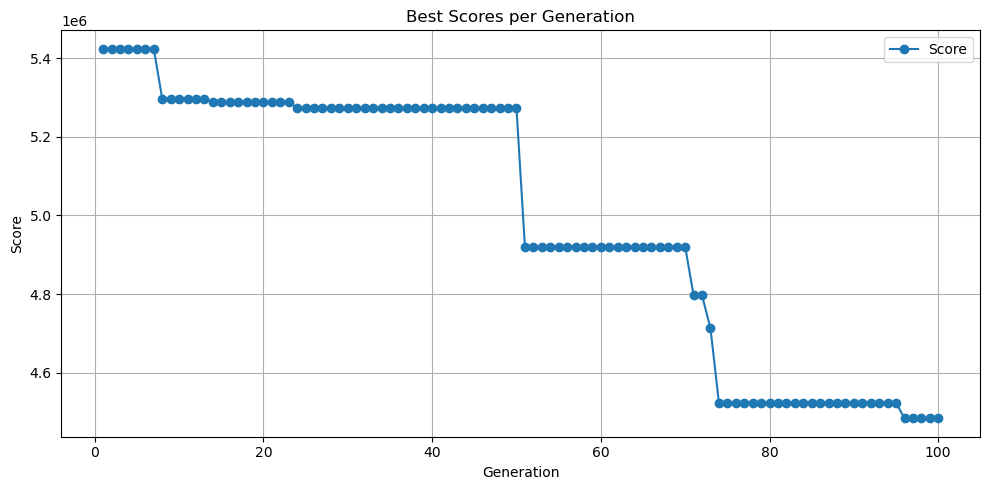

In [23]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'best_networks' and it has a 'Score' column
# We'll create a 'Generation' sequence based on the DataFrame's index starting from 1
generations = range(1, len(best_networks) + 1)

plt.figure(figsize=(10, 5))
plt.plot(generations, best_networks['Score'], marker='o', linestyle='-', label='Score')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.title('Best Scores per Generation')
plt.legend()
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()  # Optional: Makes sure the layout fits well in the figure
plt.show()


In [9]:
best_networks.tail(15)

,NET,Score,Line,TSYSCODE,FARESYSTEMSET,VEHCOMBNO,Bus_nr,Bus_tp,Bus_routes,frequency,time_offset
185,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
186,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
187,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
188,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
189,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
190,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
191,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP111, TP112, TP113, TP114, TP115]","[[13.0, 10.0, 14.0, 2.0, 6.0, 4.0, 8.0, 11.0, 12.0, 15.0, 9.0, 1.0], [11.0, 8.0, 10.0, 6.0, 5.0, 13.0, 12.0, 15.0], [11.0, 3.0, 10.0, 15.0, 6.0, 14.0, 13.0, 12.0, 4.0, 1.0, 2.0, 9.0], [10.0, 6.0, 3.0, 1.0, 12.0, 7.0, 8.0, 14.0, 13.0, 11.0, 2.0, 4.0], [5.0, 11.0, 10.0, 8.0, 7.0, 1.0, 12.0, 6.0, 13.0, 15.0, 4.0, 3.0], [14.0, 10.0, 9.0, 4.0, 15.0, 12.0, 13.0, 3.0, 5.0, 6.0, 8.0, 11.0]]","[5, 7.5, 7.5, 15, 7.5, 7.5]","[0, 1, 1, 0, 2, 0]"
192,10,2.647003e+06,ORG_1,B,,,"[110, 111, 112, 113, 114, 115]","[TP110, TP1

In [10]:
remove_line_routes()
load_net_file(visum_net_file_path)

In [11]:
remove_line_routes()
# Loads the file to Visum
load_net_file(r"C:\Users\jespe\Documents\Python\GitHub\AH203X_Degree_Project_in_Transport_Science\Mandl VISUM\Josef_test\Mandl_test_fewer_attributes.net")


In [12]:
all_stops = get_all_stop_no()
print(all_stops)  # Print the list of all line route names


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


In [13]:
# turn off redraw
Visum.Graphic.StopDrawing = True
remove_line_routes()
generate_Visum_network(8, 6)
Visum.Graphic.StopDrawing = False

In [14]:
remove_line_routes()

In [15]:
Visum.Procedures.Execute()

In [16]:
demand = helpers.GetSkimMatrixRaw(Visum, 1)
df_demand = pd.DataFrame(demand)
jrt = helpers.GetSkimMatrixRaw(Visum, 2)
df_jrd = pd.DataFrame(jrt)

In [17]:
df_demand

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,400.0,200.0,60.0,80.0,150.0,75.0,75.0,30.0,160.0,30.0,25.0,35.0,0.0,0.0
1,400.0,0.0,50.0,120.0,20.0,180.0,90.0,90.0,15.0,130.0,20.0,10.0,10.0,5.0,0.0
2,200.0,50.0,0.0,40.0,60.0,180.0,90.0,90.0,15.0,45.0,20.0,10.0,10.0,5.0,0.0
3,60.0,120.0,40.0,0.0,50.0,100.0,50.0,50.0,15.0,240.0,40.0,25.0,10.0,5.0,0.0
4,80.0,20.0,60.0,50.0,0.0,50.0,25.0,25.0,10.0,120.0,20.0,15.0,5.0,0.0,0.0
5,150.0,180.0,180.0,100.0,50.0,0.0,100.0,100.0,30.0,880.0,60.0,15.0,15.0,10.0,0.0
6,75.0,90.0,90.0,50.0,25.0,100.0,0.0,50.0,15.0,440.0,35.0,10.0,10.0,5.0,0.0
7,75.0,90.0,90.0,50.0,25.0,100.0,50.0,0.0,15.0,440.0,35.0,10.0,10.0,5.0,0.0
8,30.0,15.0,15.0,15.0,10.0,30.0,15.0,15.0,0.0,140.0,20.0,5.0,0.0,0.0,0.0
9,160.0,130.0,45.0,240.0,120.0,880.0,440.0,440.0,140.0,0.0,600.0,250.0,500.0,200.0,0.0


In [18]:
df_jrd


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
1,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
2,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
3,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
4,999999.0,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
5,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
6,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
7,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
8,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0
9,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0


In [19]:
#these are copied from my other note book and co calculations does not work yet...

def calculate_cp_score(travel_time_matrix, demand_matrix):
    """
    Calculate the CP score for a public transport network.
    
    Parameters:
    - travel_time_matrix: DataFrame, travel times with penalty included between all O-D pairs.
    - demand_matrix: DataFrame, demand between all O-D pairs.
    
    Returns:
    - CP_score: float, the calculated CP score of the network.
    """
    travel_time_matrix = travel_time_matrix.replace(999999, 1000) 
    # Multiply travel times by demands for each O-D pair
    weighted_travel_times = travel_time_matrix * demand_matrix

    # Sum the weighted travel times for the entire network
    total_weighted_travel_time = weighted_travel_times.sum().sum()

    # Sum the total demands for the network
    total_demand = demand_matrix.sum().sum()

    # Calculate the CP score
    CP_score = total_weighted_travel_time / total_demand
    
    return CP_score
import networkx as nx

def calculate_co_score(routes, travel_time_matrix, print_time=False):
    G = nx.Graph()
    total_time = 0
    visited_stations = set()
    penalty = 0
    # Build the graph from the routes
    for route in routes:
        route_time = 0
        for i in range(len(route) - 1):
            from_node = route[i]
            to_node = route[i + 1]
            visited_stations.update([from_node, to_node])
            G.add_edge(from_node, to_node)
            
            travel_time = travel_time_matrix.loc[from_node, to_node]
            route_time += travel_time

            if print_time:
                print(f"Travel time from {from_node} to {to_node}: {travel_time}")
        
        total_time += route_time

    # Check if the network is fully connected
    all_stations = set(travel_time_matrix.columns)
    
    # Remove visited stations from the set of all stations to find unvisited ones
    unvisited_stations = all_stations - visited_stations
    #print(unvisited_stations)
    penalty += len(unvisited_stations) * 100
    if not nx.is_connected(G):
        # If not, apply a penalty
        penalty += 100
        
        if print_time:
            print(f"Penalty for unconnected network: {penalty}")
    total_time += penalty
    return total_time


def calculate_score(cp, co):
    return cp

In [20]:
cp_score = calculate_cp_score(df_jrd,df_demand)
cp_score

1000.0

In [21]:
populaiton = generate_initial_population(2,6,8)
populaiton

,PJT,Routes
0,658.729742,"[[5.0, 2.0, 12.0, 14.0, 8.0], [3.0, 12.0, 7.0, 13.0, 9.0, 1.0, 14.0, 10.0], [3.0, 8.0, 9.0, 14.0, 13.0, 6.0], [8.0, 7.0], [12.0, 3.0], [6.0, 12.0]]"
1,786.562239,"[[1.0, 5.0, 11.0, 8.0, 12.0, 7.0, 6.0, 13.0], [7.0, 1.0, 11.0], [6.0, 5.0, 13.0, 12.0, 3.0], [9.0, 6.0, 5.0], [4.0, 11.0, 12.0, 7.0, 14.0, 2.0], [4.0, 13.0, 1.0, 14.0, 12.0]]"
